In [10]:
#Leemos los datos del catalogo de ultravista
dat <- read.table('ultravista_catalog.dat',na.strings='---')
dat <- dat[,-c(1,2,3)]

names <-  c('ra','dec','Xpos','Ypos','F','E(B-V)', 
            'Yap2','e_Yap2','Yap7','e_Yap7','Ymag','e_Ymag','Yr','Ysf',
            'Jap2','e_Jap2','Jap7','e_Jap7','Jmag','e_Jmag','Jr','Jsf',
            'Hap2','e_Hap2','Hap7','e_Hap7','Hmag','e_Hmag','Hr','Hsf',
            'Kap2','e_Kap2','Kap7','e_Kap7','Kmag','e_Kmag','Kr','Ksf',
            'Nap2','e_Nap2','Nap7','e_Nap7','Nmag','e_Nmag','Nr','Nsf')      
colnames(dat) <- names

In [11]:
dat <- na.omit(dat) #Sacamos las filas que no tienen alguna observacion

#Desenrojecemos
Av <- 3.1*dat$'E(B-V)'
dat$Y <- dat$Yap2-0.39*Av
dat$J <- dat$Jap2-0.28*Av
dat$H <- dat$Hap2-0.184*Av
dat$K <- dat$Kap2-0.118*Av

#Calculamos los colores
dat$Y.J <- dat$Y-dat$J
dat$H.K <- dat$H-dat$K

In [12]:
summary(dat)

       ra             dec             Xpos            Ypos      
 Min.   :149.3   Min.   :1.589   Min.   : 6394   Min.   : 7157  
 1st Qu.:149.7   1st Qu.:1.954   1st Qu.:16847   1st Qu.:15914  
 Median :150.0   Median :2.242   Median :24527   Median :22831  
 Mean   :150.0   Mean   :2.228   Mean   :25058   Mean   :22500  
 3rd Qu.:150.4   3rd Qu.:2.509   3rd Qu.:32846   3rd Qu.:29242  
 Max.   :150.8   Max.   :2.828   Max.   :42669   Max.   :36893  
     F               E(B-V)             Yap2           e_Yap2        
 Mode :logical   Min.   :0.01579   Min.   :12.40   Min.   : 0.00000  
 FALSE:160920    1st Qu.:0.01822   1st Qu.:22.37   1st Qu.: 0.01000  
 TRUE :4517      Median :0.01921   Median :23.42   Median : 0.02600  
 NA's :0         Mean   :0.01916   Mean   :23.14   Mean   : 0.04957  
                 3rd Qu.:0.02015   3rd Qu.:24.20   3rd Qu.: 0.05350  
                 Max.   :0.02352   Max.   :32.29   Max.   :83.17100  
      Yap7           e_Yap7               Ymag         

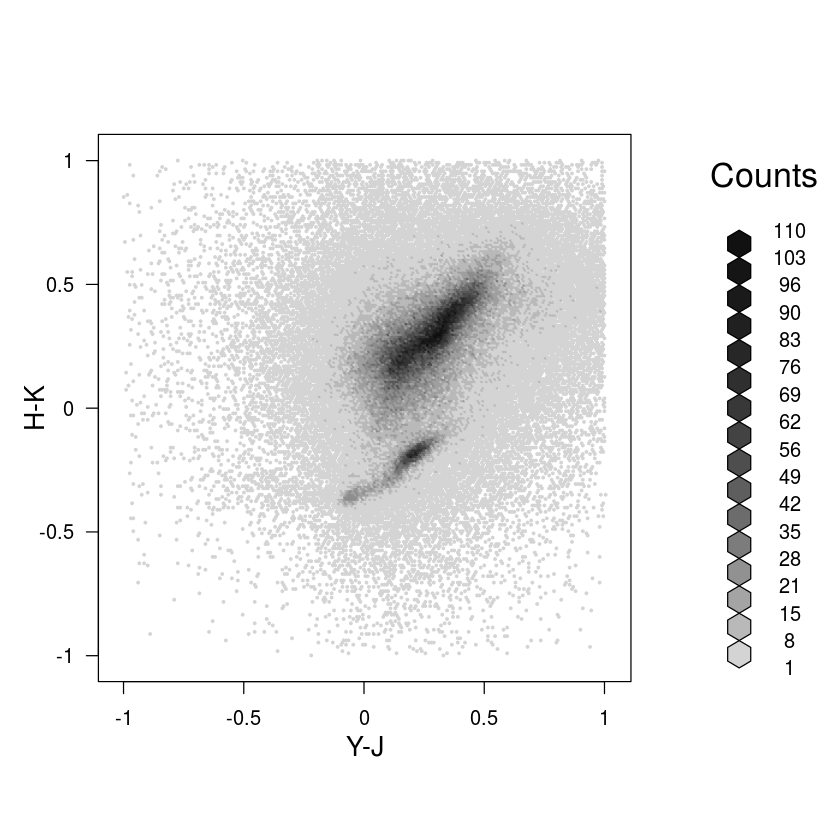

In [13]:
library('hexbin')
colores <- subset(dat, dat$Y.J > -1 & 
           dat$Y.J < 1 & dat$H.K > -1 & 
           dat$H.K < 1)

plot(hexbin(colores$Y.J,colores$H.K,xbins=200), xlab = 'Y-J', ylab = 'H-K')

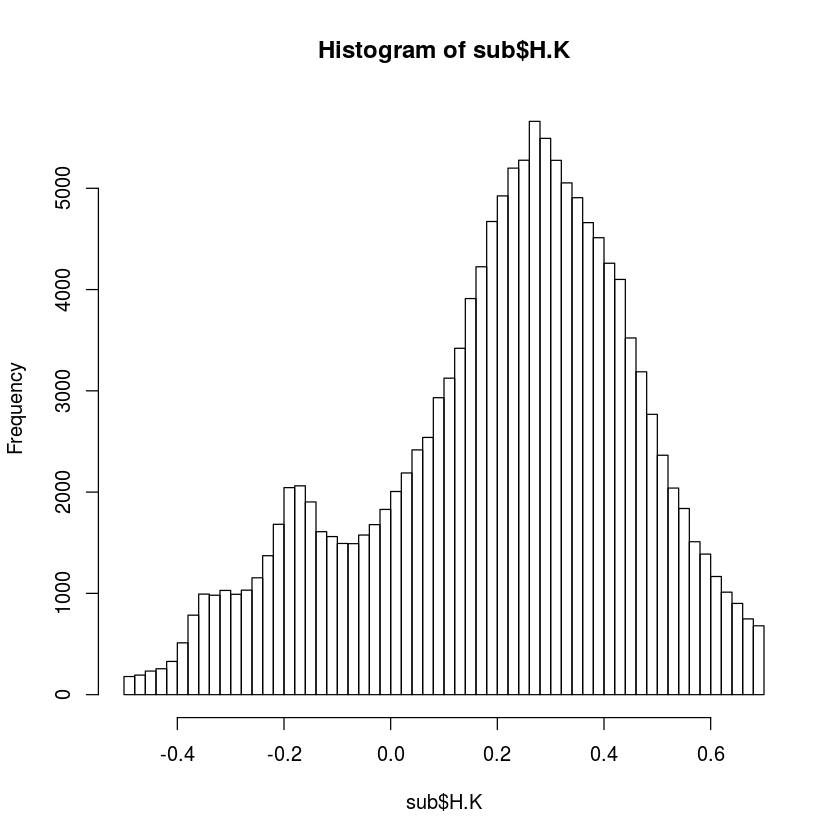

In [14]:
sub = subset(dat, (dat$H.K > -0.5 & dat$H.K < 0.7 & dat$Y.J > -0.5 & dat$Y.J < 0.7))
hist(sub$H.K, breaks=50)
# plot(density(aux$H.K, bandwidth=0.0001), log = 'y', xlim=c(-0.5,1))

In [15]:
library('mclust')
set.seed(28890) #Pongamos una semilla "a mano"

ind <- sample(1:length(sub$Y), size = 5000) #Hago un sampleo random por q sino no me da la ram
aux <- sub[ind,]
aux <- subset(aux, select = c('Y.J', 'H.K', 'Jr')) #Pruebo solo con los colores
aux <- subset(aux, aux$Jr < 10 & aux$Jr > 0) #Pongo limites logicos en el radio
mc <- Mclust(aux, G = 2:3)

In [16]:
mc$G #Vemos que encuentra 3 clusters

[1] 3

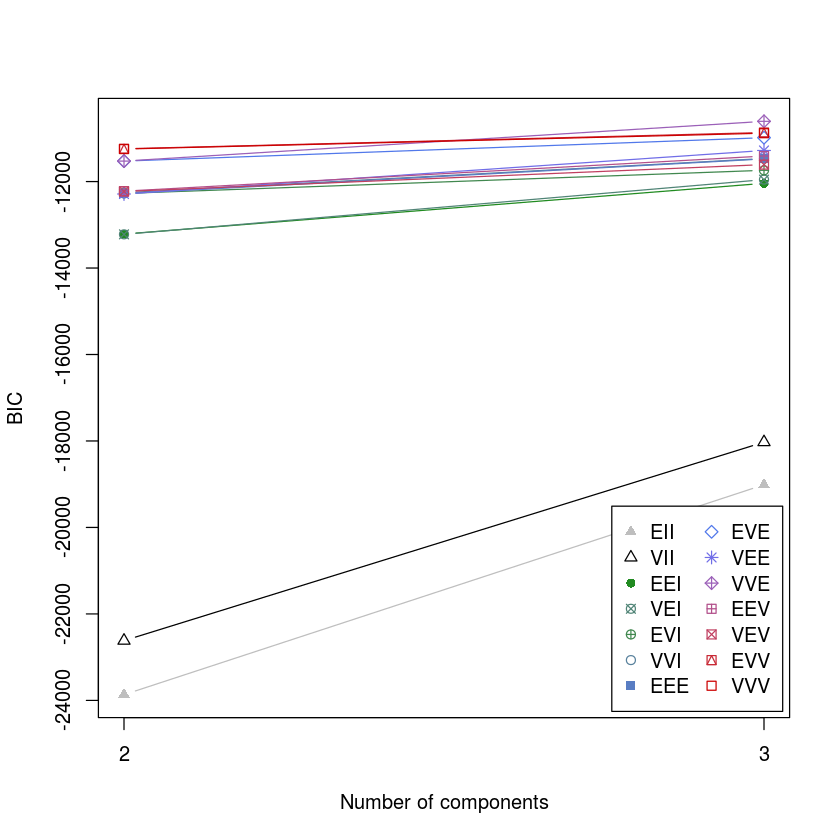

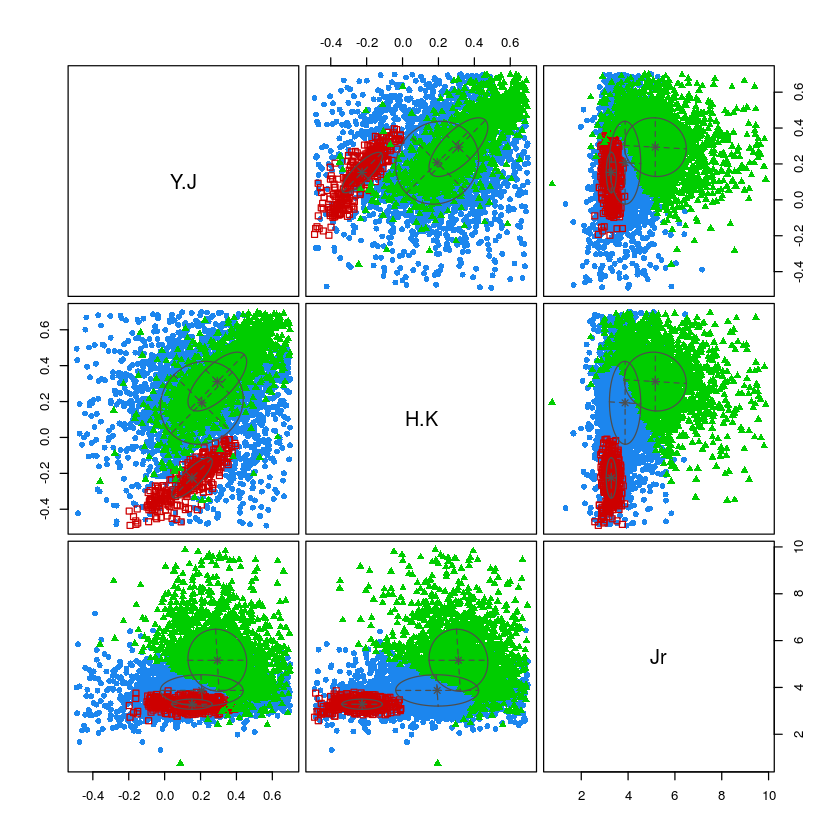

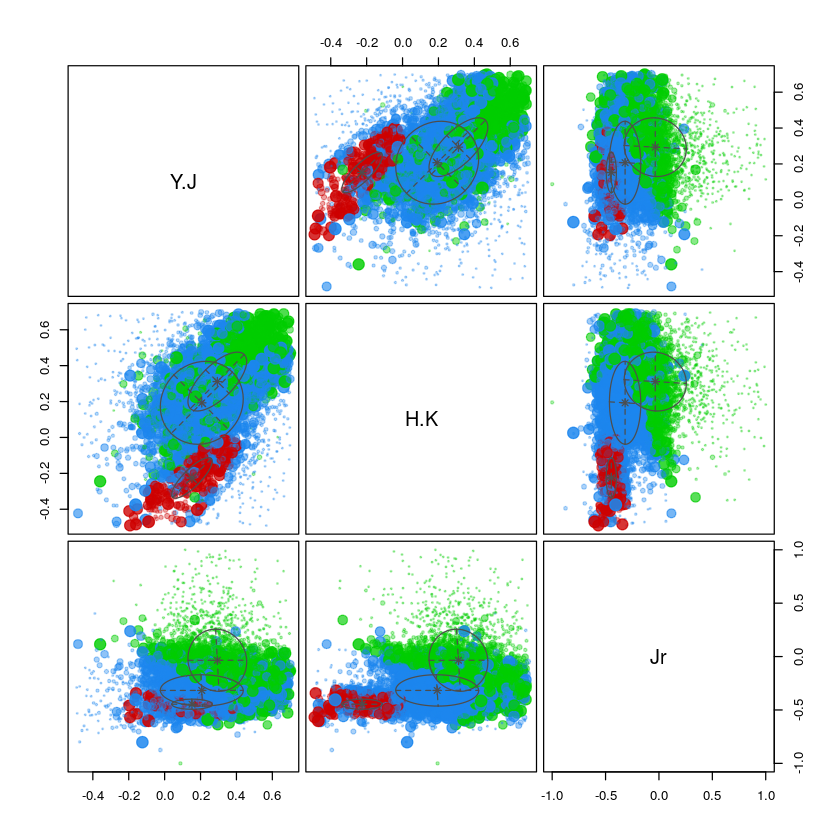

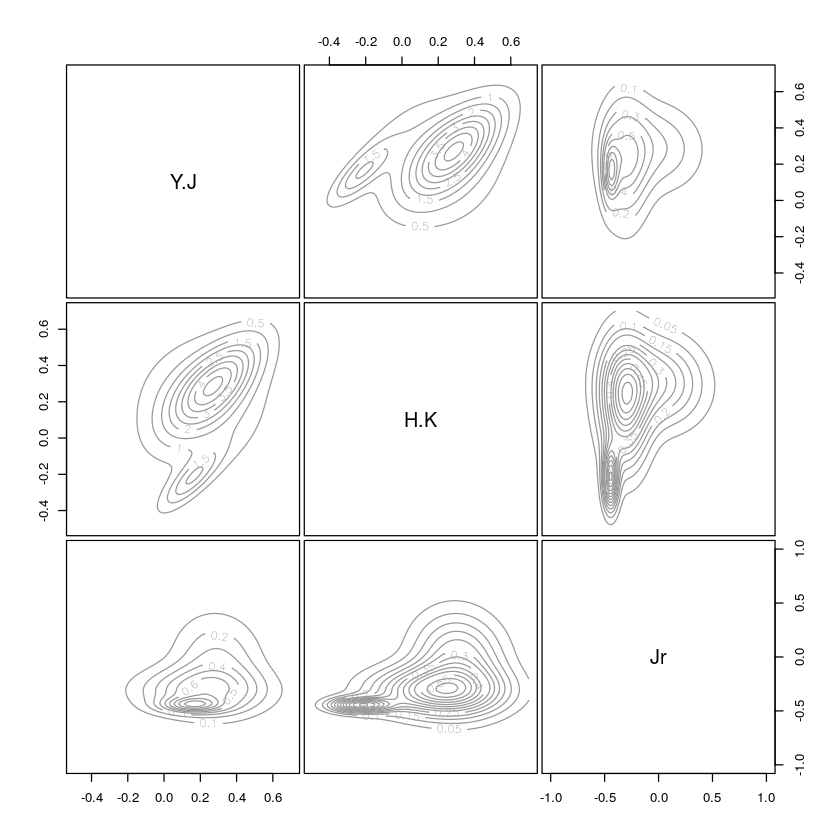

In [17]:
plot(mc)

In [18]:
p1 <- mc$z[,1] #Vector con las probabilidades de pertenecer al grupo 1
p2 <- mc$z[,2] #Vector con las probabilidades de pertenecer al grupo 2
p3 <- mc$z[,3] #Vector con las probabilidades de pertenecer al grupo 3

class <- mc$classification
aux <- data.frame(aux, class, p1, p2, p3)

aux1 <- subset(aux, aux$class == 1)
aux2 <- subset(aux, aux$class == 2)
aux3 <- subset(aux, aux$class == 3)

In [20]:
hx1 <- hexbin(aux1$Y.J,aux1$H.K,xbins=200)
hx2 <- hexbin(aux2$Y.J,aux2$H.K,xbins=200)
hx3 <- hexbin(aux3$Y.J,aux3$H.K,xbins=200)
hx <- hexbin(colores$Y.J,colores$H.K,xbins=200)

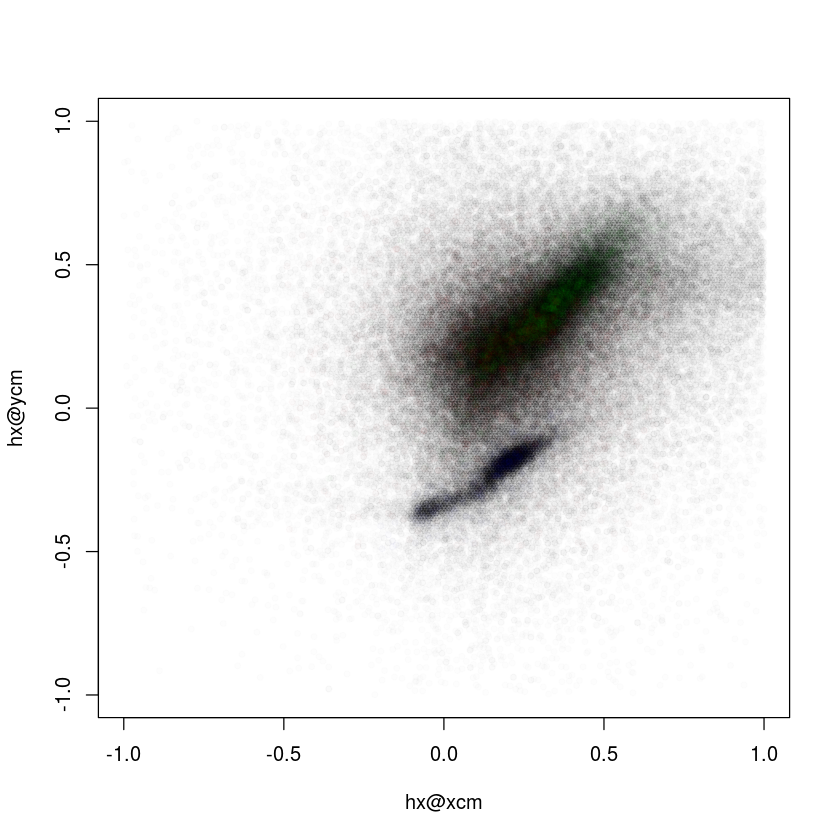

In [40]:
plot(hx@xcm,hx@ycm,col=rgb(0,0,0,hx@count/(max(hx@count))), pch=20)
points(hx1@xcm,hx1@ycm,col=rgb(1,0,0,hx1@count/(max(hx@count))), pch=20)
points(hx2@xcm,hx2@ycm,col=rgb(0,0,1,hx2@count/(max(hx@count))), pch=20)
points(hx3@xcm,hx3@ycm,col=rgb(0,1,0,hx3@count/(max(hx@count))), pch=20)

In [24]:
aux1 <- subset(aux1, aux1$p1 > 0.5 ) #Me quedo con los que tienen mayor probabilidad
aux2 <- subset(aux2, aux2$p2 > 0.5) #Me quedo con los que tienen mayor probabilidad
aux3 <- subset(aux3, aux3$p3 > 0.5) #Me quedo con los que tienen mayor probabilidad

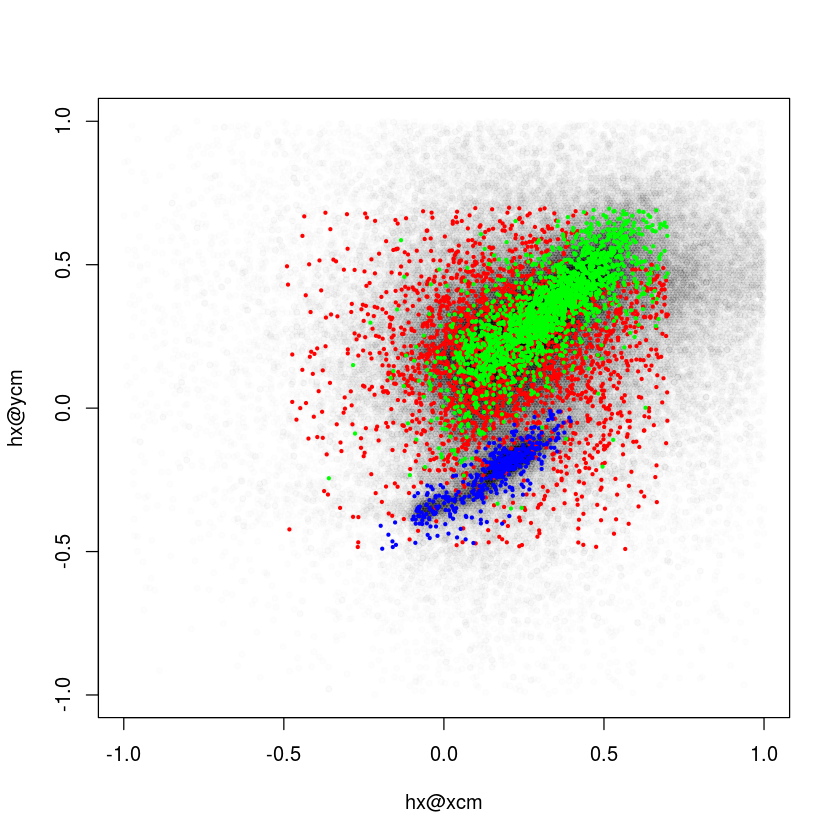

In [25]:
plot(hx@xcm, hx@ycm, col = rgb(0,0,0,hx@count/(max(hx@count))), pch = 20)
points(aux1$Y.J, aux1$H.K, col = rgb(1,0,0), pch=20, cex = 0.5)
points(aux2$Y.J, aux2$H.K, col = rgb(0,0,1), pch=20, cex = 0.5)
points(aux3$Y.J, aux3$H.K, col = rgb(0,1,0), pch=20, cex = 0.5)

In [32]:
# Usando el modelo de clustering creado con 5000 observaciones random, predecimos la clasificaion de todas
prediction <- predict(mc, newdata = subset(dat, select = c('Y.J', 'H.K', 'Jr')))

In [33]:
dat_pred <- data.frame(dat, class = prediction$classification, p1 = prediction$z[,1], p2 = prediction$z[,2],
                 p3 = prediction$z[,3])

In [38]:
# Veamos como quedaron los datos
dat1 <- subset(dat_pred, dat_pred$class == 1 & dat_pred$p1 > 0.9 & dat_pred$p2 < 0.1 & dat_pred$p3 < 0.1)
dat2 <- subset(dat_pred, dat_pred$class == 2 & dat_pred$p2 > 0.9 & dat_pred$p1 < 0.1 & dat_pred$p3 < 0.1)
dat3 <- subset(dat_pred, dat_pred$class == 3 & dat_pred$p3 > 0.9 & dat_pred$p1 < 0.1 & dat_pred$p2 < 0.1)

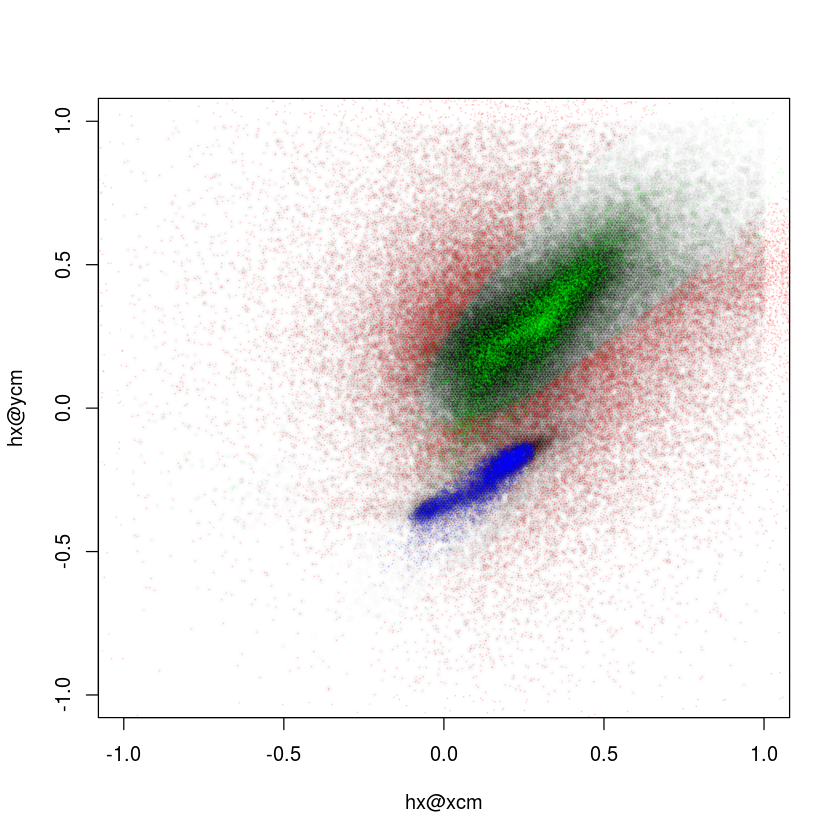

In [39]:
plot(hx@xcm, hx@ycm, col = rgb(0,0,0,hx@count/(max(hx@count))), pch = 20)
points(dat1$Y.J, dat1$H.K, col = rgb(1,0,0,0.1), pch=20, cex = 0.1)
points(dat2$Y.J, dat2$H.K, col = rgb(0,0,1,0.1), pch=20, cex = 0.1)
points(dat3$Y.J, dat3$H.K, col = rgb(0,1,0,0.1), pch=20, cex = 0.1)